In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('Dataset-SA.csv')

In [3]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [4]:
# Checking for missing values
print(df.isnull().sum())

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64


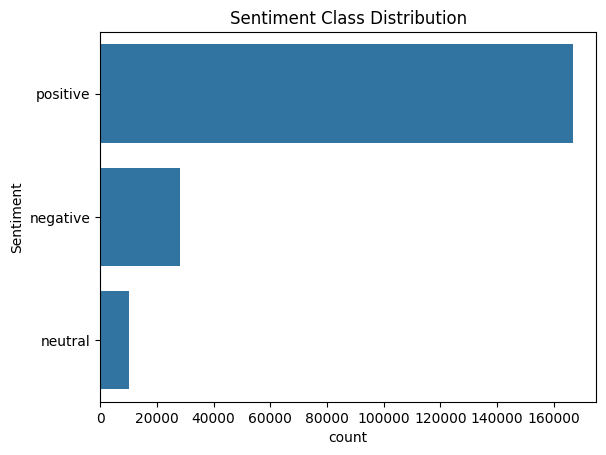

In [5]:
# Visualizing class distribution
sns.countplot(df['Sentiment'])
plt.title('Sentiment Class Distribution')
plt.show()

In [6]:
# Downloading necessary NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [30]:
# Define text preprocessing function with error handling for non-string values
def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()  
    text = re.sub(r'[^a-zA-Z\s]', '', text)    
    tokens = word_tokenize(text)     
    tokens = [word for word in tokens if word not in stopwords.words('english')]    
    return ' '.join(tokens)    

In [31]:
print(df.columns)

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment', 'cleaned_text'],
      dtype='object')


In [10]:
# Apply preprocessing
df['cleaned_text'] = df['Review'].apply(preprocess_text)

In [11]:
df['cleaned_text'].head()

0              super
1            awesome
2               fair
3    useless product
4               fair
Name: cleaned_text, dtype: object

In [12]:
df = df[df['cleaned_text'].str.strip() != '']

In [13]:
df['cleaned_text']

0                   super
1                 awesome
2                    fair
3         useless product
4                    fair
               ...       
205047           must buy
205048              super
205049               nice
205050                wow
205051      valueformoney
Name: cleaned_text, Length: 180383, dtype: object

In [14]:
# Vectorization using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['cleaned_text'])
y = df['Sentiment'] 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [17]:
# Train Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [18]:
y_pred_nb = nb_model.predict(X_test)

In [19]:
print("Naive Bayes Model Evaluation:")
print(classification_report(y_test, y_pred_nb, target_names=['positive', 'negative', 'neutral']))

Naive Bayes Model Evaluation:
              precision    recall  f1-score   support

    positive       0.85      0.76      0.80      4786
    negative       0.10      0.54      0.17      1749
     neutral       0.97      0.73      0.84     29542

    accuracy                           0.73     36077
   macro avg       0.64      0.68      0.60     36077
weighted avg       0.91      0.73      0.80     36077



### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['Sentiment']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [24]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000)

In [25]:
y_pred_logistic = logistic_model.predict(X_test)

In [26]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.76      0.80      4786
     neutral       0.13      0.45      0.21      1749
    positive       0.97      0.85      0.90     29542

    accuracy                           0.81     36077
   macro avg       0.65      0.69      0.64     36077
weighted avg       0.91      0.81      0.85     36077

Logistic Regression Confusion Matrix:
[[ 3619   895   272]
 [  332   793   624]
 [  334  4229 24979]]


In [27]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred, labels=['positive', 'negative', 'neutral'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

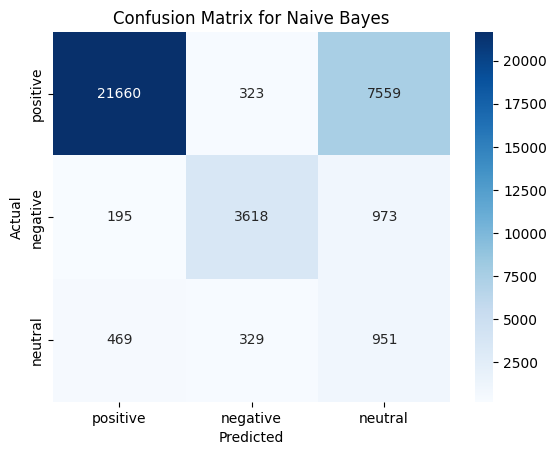

In [28]:
# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, title='Confusion Matrix for Naive Bayes')

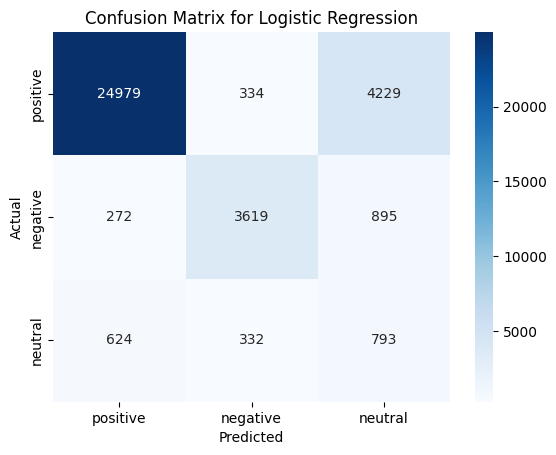

In [29]:
# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_logistic, title='Confusion Matrix for Logistic Regression')